In [1]:
import os
import re
import time
import json
from collections import defaultdict

import scipy as sc
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [2]:
BASE_DIR = os.path.dirname(os.path.abspath('.'))
DATA_DIR = os.path.join(BASE_DIR, 'datas')

## Data Description

In [3]:
cbdb_edgelist_fpath = os.path.join(DATA_DIR, 'cbdb_edgelist.tsv')
cbdb_edgeinfo_fpath = os.path.join(DATA_DIR, 'cbdb_edgeinfo.tsv')
cbdb_nodeinfo_fpath = os.path.join(DATA_DIR, 'cbdb_nodeinfo.tsv')

In [4]:
edge_df = pd.read_csv(cbdb_edgelist_fpath, sep='\t')

In [5]:
edge_df

,PersonIdA,PersonIdB,Sign,Time,Note
0,449689,13575,1,-1,438
1,40763,10173,1,-1,146
2,40763,10173,1,-1,146
3,40763,10173,1,-1,444
4,40763,10173,1,-1,444
...,...,...,...,...,...
149380,93201,176408,1,-1,437
149381,93201,445999,1,-1,437
149382,93201,448917,1,-1,437
149383,93201,93832,1,-1,438


In [6]:
edgeinfo_df = pd.read_csv(cbdb_edgeinfo_fpath, sep='\t')

In [7]:
edgeinfo_df

,Note,Info
0,437,"{""Info"": ""\u8d08\u8a69\u3001\u6587"", ""Sign"": 1}"
1,438,"{""Info"": ""\u6536\u5230Y\u7684\u8d08\u8a69\u300..."
2,43,"{""Info"": ""\u5893\u8a8c\u9298\u7531Y\u6240\u4f5..."
3,44,"{""Info"": ""\u70baY\u4f5c\u5893\u8a8c\u9298"", ""S..."
4,33,"{""Info"": ""\u66f8\u5e8f\u7531Y\u6240\u4f5c"", ""S..."
...,...,...
446,547,"{""Info"": ""\u6c42\u4ed6\u4eba\uff08\u7b2c\u4e09..."
447,248,"{""Info"": ""\u7fa9\u838a\u898f\u77e9\u5e8f\u7531..."
448,548,"{""Info"": ""\u795e\u9053\u7891\u4fc2\u7531Y\u541..."
449,189,"{""Info"": ""\u53cd\u5c0d\u8d66\u514d"", ""Sign"": -1}"


In [8]:
print(json.loads(edgeinfo_df.iloc[0]['Info']))

{'Info': '贈詩、文', 'Sign': 1}


In [9]:
nodeinfo_df = pd.read_csv(cbdb_nodeinfo_fpath, sep='\t')

In [10]:
nodeinfo_df

,PersonId,Info
0,449689,"{""PersonId"": ""449689"", ""EngName"": ""Liu Jing"", ..."
1,436212,"{""PersonId"": ""436212"", ""EngName"": ""Huang Zhuoh..."
2,281900,"{""PersonId"": ""281900"", ""EngName"": ""Wu You"", ""C..."
3,328918,"{""PersonId"": ""328918"", ""EngName"": ""Yang Yugao""..."
4,395541,"{""PersonId"": ""395541"", ""EngName"": ""Tang Xuzu"",..."
...,...,...
463354,357829,"{""PersonId"": ""357829"", ""EngName"": ""Li Ru"", ""Ch..."
463355,442762,"{""PersonId"": ""442762"", ""EngName"": ""Yao Ying"", ..."
463356,497925,"{""PersonId"": ""497925"", ""EngName"": ""Wang Lanbi""..."
463357,389134,"{""PersonId"": ""389134"", ""EngName"": ""Yu Shiling""..."


In [11]:
print(json.loads(nodeinfo_df.iloc[0]['Info']))

{'PersonId': '449689', 'EngName': 'Liu Jing', 'ChName': '劉競', 'IndexYear': '', 'Gender': '', 'YearBirth': '', 'DynastyBirth': '', 'EraBirth': '', 'EraYearBirth': '', 'YearDeath': '', 'DynastyDeath': '', 'EraDeath': '', 'EraYearDeath': '', 'YearsLived': '', 'Dynasty': '唐', 'JunWang': '', 'Notes': '', 'url': 'https://cbdb.fas.harvard.edu/cbdbapi/person.php?id=449689&o=json'}


## Data Analysis

### Time Span

count    30877.000000
mean      1180.076627
std        135.731470
min        117.000000
25%       1095.000000
50%       1177.000000
75%       1235.000000
max       1950.000000
Name: Time, dtype: float64


<AxesSubplot:>

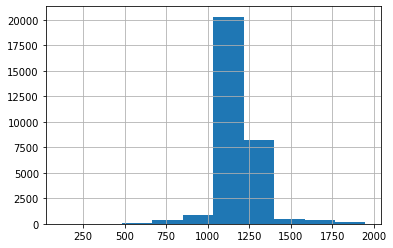

In [12]:
print(edge_df['Time'].replace(-1, np.nan).describe())

edge_df['Time'].replace(-1, np.nan).hist()

### Negative Link  Ratio

In [13]:
edge_num = len(edge_df)
pos_edge_num = len(edge_df[edge_df['Sign'] > 0])
neg_edge_num = len(edge_df[edge_df['Sign'] < 0])

print('Edge Num', edge_num)
print('Pos Edge Num', pos_edge_num)
print('Neg Edge Num', neg_edge_num)

Edge Num 149385
Pos Edge Num 144184
Neg Edge Num 4875


### Negative Link Ratio with Time

<BarContainer object of 33 artists>

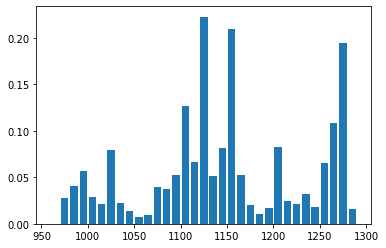

In [17]:
time_span = 10
edge_df_time = edge_df['Time'].replace(-1, np.nan).dropna().astype(int)
time_max, time_min = edge_df_time.max(), edge_df_time.min()
time_min = 960
time_max = 1300
i = time_min
x = []
y = []
for j in range(time_min + time_span, time_max, time_span):
    edge_tmp = edge_df[(edge_df['Time'] < j) & (edge_df['Time'] >= i)]
    edge_num = len(edge_tmp)
    pos_edge_num = len(edge_tmp[edge_tmp['Sign'] > 0])
    neg_edge_num = len(edge_tmp[edge_tmp['Sign'] < 0])
    
    x.append((i + j)/2)
    ratio = -1 if edge_num == 0 else neg_edge_num / edge_num
    y.append(  ratio)
    i = j
x = np.array(x)
y = np.array(y)
plt.bar(x, y, width=8)